In [2]:
import pandas as pd

# Time series / date functionality in Pandas
* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* We're going to look at three different concepts in Pandas
    - 1) Timestamps
    - 2) Timedeltas

## 1) Timestamp objects
* Pandas has built-in TimeStamp objects
* An array of TimeStamp objects are a DateTimeIndex
* The datatype of a TimeStamp object is datetime64
* There are two main methods of creating Timestamps or a DateTimeIndex:
    - 1) `pd.to_datetime()`
    - 2) `pd.date_range()`

#### `pd.to_datetime()`

- You can use a lot of different formats to convert a string into a Timestamp

In [3]:
pd.to_datetime('02 March 2020')

Timestamp('2020-03-02 00:00:00')

In [4]:
type(pd.to_datetime('02 March 2020'))

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
pd.to_datetime('03/02/2020')

Timestamp('2020-03-02 00:00:00')

In [6]:
pd.to_datetime('02-03-2020')

Timestamp('2020-02-03 00:00:00')

In [8]:
pd.to_datetime('02-03-2020', dayfirst = True)

Timestamp('2020-03-02 00:00:00')

- You could also pass a pd.Series or a pd.DataFrame into `pd.to_datetime()` if the values are convertable to a Timestamp.

In [15]:
dates = ['02 March 2020', '04/03/2020']

In [16]:
pd.to_datetime(dates)

DatetimeIndex(['2020-03-02', '2020-04-03'], dtype='datetime64[ns]', freq=None)

#### `pd.date_range()`

What happens if you want to create a range of dates?
You can use `pd.date_range()` to create a DateTimeIndex (array of Timestamps):

In [18]:
date_range = pd.date_range('14 February 2020', '02 March 2020', freq = 'D')

In [20]:
pd.Series(date_range) # so this can also be used as a variable within a DF

0    2020-02-14
1    2020-02-15
2    2020-02-16
3    2020-02-17
4    2020-02-18
5    2020-02-19
6    2020-02-20
7    2020-02-21
8    2020-02-22
9    2020-02-23
10   2020-02-24
11   2020-02-25
12   2020-02-26
13   2020-02-27
14   2020-02-28
15   2020-02-29
16   2020-03-01
17   2020-03-02
dtype: datetime64[ns]

In [21]:
date_range[2].hour

0

In [22]:
date_range[2].year

2020

### This is all nice and fine, but why do we care?

The reason we care for Timestamps in pandas is because they allow us to perform time related actions on the data.
Several things you can do with a timestamp:

- extract the hour
- extract the day
- extract the month
- extract the year
- **Slice a DataFrame or Series if the DateTimeIndex is the Index of the DataFrame**
- calculate time differences

How could that be useful?
Let us look at the data for this week and think about what we could do with this functionality:

- Extract weekdays from the Timestamp
- Extract the hour of the day from the Timestamp
- Create subsets of the data
- ...

In [31]:
df = pd.read_csv('./train.csv', parse_dates = True, index_col = 0)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [33]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [36]:
df['2011-01-01'] #all the values in 1st of Jan

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [37]:
df['2011-01'] # all Jan

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [38]:
df['2011-01': '2011-06']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [39]:
df.loc['2011-01':'2011-06']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [41]:
df.loc['2011-01-01 00':'2011-01-01 07'] # or df[] would also work

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3


In [42]:
df['2011-01-01 00'] # wont work without .loc!!

KeyError: '2011-01-01 00'

In [43]:
df.index.resolution

'hour'

The reason df['      hh'] doesn't work because the resolution is in the hour, so it wont look at the last one . If the resolution was the minutes, it would have worked without .loc too!!

#### `df.between_time()`

In [44]:
df.between_time('00:00:00', '02:00:00') # each day between this time

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17
2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1,16,17
2011-01-02 02:00:00,1,0,0,2,17.22,21.210,100,19.0012,1,8,9
2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
2011-01-04 00:00:00,1,0,1,1,6.56,9.090,55,7.0015,0,5,5


## 2) Timedelta objects

Pandas has built-in Timedelta objects
* An array of Timedelta objects is a TimedeltaIndex
* The datatype of a TimeStamp object is timedelta64
* There are three methods of creating Timedeltas or a TimedeltaIndex:
    - 1) `pd.to_timedelta()`
    - 2) `pd.timedelta_range()`
    - 3) Subtract two pd.Timestamp objects

In [50]:
timedifference = df.index.max() - df.index.min()

In [54]:
timedifference.days

718

In [55]:
timedifference.seconds

82800

In [53]:
pd.to_timedelta(timedifference, unit = 'minute' )

Timedelta('718 days 23:00:00')

## Other concepts: `resample()`, `shift()` and `rolling()`

In [57]:
df.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [58]:
df.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [61]:
downsampled = df.resample('D').sum()

In [62]:
downsampled

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01,24,0,0,38,338.66,436.350,1934,257.9969,331,654,985
2011-01-02,23,0,0,45,342.76,406.800,1601,382.9988,131,670,801
2011-01-03,22,0,22,22,177.12,208.345,962,366.0076,120,1229,1349
2011-01-04,23,0,23,24,188.60,243.940,1358,247.0156,108,1454,1562
2011-01-05,23,0,23,23,214.02,263.660,1005,288.0129,82,1518,1600
2011-01-06,23,0,23,31,192.70,268.190,1192,138.0200,88,1518,1606
2011-01-07,23,0,23,39,185.32,240.165,1147,260.0069,148,1362,1510
2011-01-08,24,0,0,41,162.36,194.705,1286,429.0211,68,891,959
2011-01-09,24,0,0,24,136.12,139.410,1042,582.0156,54,768,822


In [63]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [66]:
df['yesterday'] = df['count'].shift(-24)

In [67]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tomorrow,yesterday
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,NaN,17.0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,NaN,17.0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,NaN,9.0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,NaN,6.0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,NaN,3.0


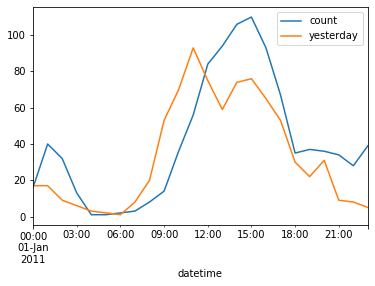

In [70]:
df['2011-01-01'][['count', 'yesterday']].plot()

In [72]:
df['rolling'] = df['count'].rolling(24).mean() # shifting windown of .mean in this case

In [73]:
df.head(50)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tomorrow,yesterday,rolling
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,NaN,17.0,NaN
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,NaN,17.0,NaN
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,NaN,9.0,NaN
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,NaN,6.0,NaN
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,NaN,3.0,NaN
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,NaN,2.0,NaN
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,NaN,1.0,NaN
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,NaN,8.0,NaN
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,NaN,20.0,NaN


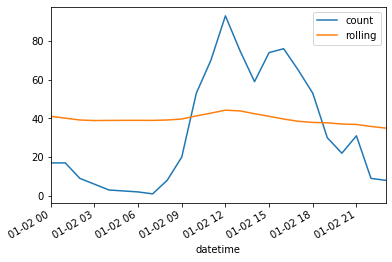

In [74]:
df['2011-01-02'][['count', 'rolling']].plot()